In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

### Data Load

In [2]:
train = pd.read_csv("train.csv")

print(train.shape)
train.head()

(10024, 13)


,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views
0,게임,"댓글 4,919개",2018.08.23,277,1.3만,0:14,151만,"['마인크래프트', 'Minecraft', '샌드박스 네트워크', '샌드박스', '...",마크판 거지키우기 업그레이드 *크리에이터* 키우기! - 마인크래프트 - [잠뜰],그동안 여러분이 잠뜰TV에서 가장 재밌게 본 영상은?!\n댓글에 많이 남겨주시고 좋...,게시일: 2018. 8. 17.,https://www.youtube.com/watch?v=azoDJNPRU7s&li...,"조회수 579,949회"
1,게임,"댓글 4,964개",2018.08.23,278,8.7천,0:15,236만,"['도티', '도티 마피아', '도티 머더', '마피아 머더', 'mafia', '...","직업 머더 ""곤충""능력 특집 (부제: 파브르와 저승벌레 팡수)",다음 컨셉은 아이스 크림 어떨까요?예를 들면스크류바:술래가 한 대 치면 술래를 5초...,게시일: 2018. 8. 20.,https://www.youtube.com/watch?v=-BnUuHgUK5Q&li...,"조회수 451,676회"
2,게임,"댓글 5,262개",2018.08.23,561,2.3만,6:47,246만,"['보겸', '보겸TV', 'bokyem', '도티', '롤', '오버워치', '원...",14번의”아디오스” ㄷ1지고싶으면 들이대봐 드루와,모듀 ㅂㅇㄹ ^_^* \nㅋㅋㅋ 역대 최대킬 ㅋㅋㅋ\n고마워 ^_^+ 가조쿠들 ㅋㅋ...,게시일: 2018. 8. 18.,https://www.youtube.com/watch?v=v0rDCGLcnpU&li...,"조회수 955,578회"
3,게임,"댓글 1,823개",2018.08.23,404,1.1천,13:00,23만,"['게임', '위닝', '위닝일레븐', '축구게임', '말이야와 게임들 축구게임',...",그때 눈물의 축구 게임 복수전! 과연 미니 고수 말이야 이길 수 있을까? (꿀잼) ...,"사랑하는 말랑이 여러분! 다음에는 말이야, 로기, 미니 축구팀을 댓글로 남겨주세요....",게시일: 2018. 8. 18.,https://www.youtube.com/watch?v=cK8Z2fz0iUI&li...,"조회수 191,211회"
4,게임,"댓글 1,159개",2018.08.23,36,3.4천,10:00,47만,"['카베', '모바일베그', '배그M', '카카오베그', '연다', '배틀그라운드'...",초보자도 여포로 만들어 줄 수 있는 총 조합! 제가 알려드리죠 ㅋㅋ (배틀그라운드-...,크흠...저런 총이 있어도 난 여포가 아니라 쥐포가 될것 같은데...\niny070...,게시일: 2018. 8. 21.,https://www.youtube.com/watch?v=bBbHq5sMqP0&li...,"조회수 162,253회"


### Upload_date
- 게시년, 월, 일

In [3]:
ls=list(train["upload_date"])

In [4]:
del_list = []
for i, s in enumerate(ls):
    if "시간시간" in s:
        print(s)
        del_list.append(i)
del_list

실시간 스트림: 14시간시간 전
실시간 스트림: 10시간시간 전
실시간 스트림: 12시간시간 전
실시간 스트림: 21시간시간 전
실시간 스트림: 18시간시간 전
실시간 스트림: 21시간시간 전
실시간 스트림: 17시간시간 전
실시간 스트림: 15시간시간 전
실시간 스트림: 18시간시간 전
실시간 스트림: 3시간시간 전
실시간 스트림: 22시간시간 전
실시간 스트림: 23시간시간 전
실시간 스트림: 14시간시간 전
실시간 스트림: 11시간시간 전
실시간 스트림: 10시간시간 전
실시간 스트림: 10시간시간 전
실시간 스트림: 22시간시간 전
실시간 스트림: 11시간시간 전
실시간 스트림: 23시간시간 전
실시간 스트림: 9시간시간 전
실시간 스트림: 21시간시간 전
실시간 스트림: 21시간시간 전
실시간 스트림: 22시간시간 전


[3197,
 3251,
 3263,
 4879,
 4885,
 4906,
 4923,
 4928,
 5279,
 6647,
 7368,
 7390,
 7402,
 7411,
 8134,
 8135,
 8393,
 8425,
 8531,
 8536,
 8557,
 8559,
 8653]

In [5]:
train = train.drop(del_list)
train.shape

(10001, 13)

In [6]:
train = train.reset_index(drop=True)

In [7]:
s = '게시일: 2014. 2. 26.'

In [8]:
s[5:-1].replace(" ","").split(".")

['2014', '2', '26']

In [9]:
def upload_date_clear_year(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[0])
    else:
        return int(date[5:-1].replace(" ","").split(".")[0])

def upload_date_clear_month(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[1])
    else:
        return int(date[5:-1].replace(" ","").split(".")[1])

def upload_date_clear_day(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[2])
    else:
        return int(date[5:-1].replace(" ","").split(".")[2])

In [10]:
train["upload_date_year"] = train["upload_date"].apply(upload_date_clear_year)
train["upload_date_month"] = train["upload_date"].apply(upload_date_clear_month)
train["upload_date_day"] = train["upload_date"].apply(upload_date_clear_day)

In [11]:
train[["upload_date_year", "upload_date_month", "upload_date_day"]].head()

,upload_date_year,upload_date_month,upload_date_day
0,2018,8,17
1,2018,8,20
2,2018,8,18
3,2018,8,18
4,2018,8,21


### Crawl_date

In [12]:
s = '2014.2.26'

In [13]:
int(s.split(".")[0])

2014

In [14]:
def crawl_data_clear_year(date):
    return int(date.split(".")[0])

def crawl_data_clear_month(date):
    return int(date.split(".")[1])

def crawl_data_clear_day(date):
    return int(date.split(".")[2])

In [15]:
train["crawl_date_year"] = train["crawl_date"].apply(crawl_data_clear_year)
train["crawl_date_month"] = train["crawl_date"].apply(crawl_data_clear_month)
train["crawl_date_day"] = train["crawl_date"].apply(crawl_data_clear_day)

In [16]:
train[["crawl_date_year", "crawl_date_month", "crawl_date_day"]].head()

,crawl_date_year,crawl_date_month,crawl_date_day
0,2018,8,23
1,2018,8,23
2,2018,8,23
3,2018,8,23
4,2018,8,23


### Uploaded days

In [17]:
from datetime import date

for idx in tqdm(range(0, len(train))):
    d0 = date(train["upload_date_year"].loc[idx], train["upload_date_month"].loc[idx], train["upload_date_day"].loc[idx])
    d1 = date(train["crawl_date_year"].loc[idx], train["crawl_date_month"].loc[idx], train["crawl_date_day"].loc[idx])
    train.loc[idx, "uploaded_days"] = (d1 - d0).days + 1

100%|██████████| 10001/10001 [00:07<00:00, 1310.18it/s]


In [18]:
train[["uploaded_days"]].head()

,uploaded_days
0,7.0
1,4.0
2,6.0
3,6.0
4,3.0


### Views
- 조회수 ( 일평균 조회수를 target 값으로 사용 )
- 예측할 target

In [19]:
def views_clear(view):
    if view == '조회수 없음':
        return 0
    else:
        return int(view[4:-1].replace(",",""))

In [20]:
train["views"] = train["views"].apply(views_clear)

In [21]:
train["views"].head()

0    579949
1    451676
2    955578
3    191211
4    162253
Name: views, dtype: int64

In [22]:
train["views"] = train["views"] / train["uploaded_days"]

In [23]:
train["views"].head()

0     82849.857143
1    112919.000000
2    159263.000000
3     31868.500000
4     54084.333333
Name: views, dtype: float64

### Category

In [24]:
train["category"].value_counts()

음악          1907
엔터테인먼트      1793
인물/블로그      1576
뉴스/정치       1204
스포츠          836
영화/애니메이션     721
노하우/스타일      602
게임           424
코미디          288
동물           182
교육           142
프로그램          93
여행/이벤트        77
과학기술          61
비영리/사회운동      54
자동차           41
Name: category, dtype: int64

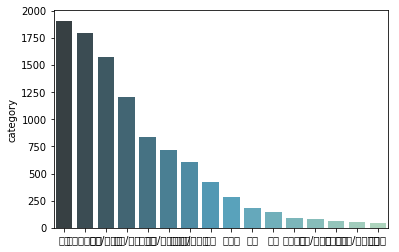

In [25]:
sns.barplot(train["category"].value_counts().index, train["category"].value_counts(), palette="GnBu_d")